In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

In [39]:
def _data_import(train_data_loc = "../data/train.csv"):
    return pd.read_csv(train_data_loc)


def _data_clean_up(df=data):
    df = df.copy()
    boolean_cols_dict = [('Gender', 'Female'),
                         ('Over18', 'Y'),
                         ('OverTime', 'Yes'),
                         ]
    for col in boolean_cols_dict:
        df[col[0]] = (df[col[0]] == col[1]).astype(int)
    df = df.rename(columns={"Gender":"is_female"})
    df = df.drop(columns=['id', 'StandardHours'])
    return df

data = _data_clean_up(_data_import())

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1677 entries, 0 to 1676
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1677 non-null   int64 
 1   BusinessTravel            1677 non-null   object
 2   DailyRate                 1677 non-null   int64 
 3   Department                1677 non-null   object
 4   DistanceFromHome          1677 non-null   int64 
 5   Education                 1677 non-null   int64 
 6   EducationField            1677 non-null   object
 7   EmployeeCount             1677 non-null   int64 
 8   EnvironmentSatisfaction   1677 non-null   int64 
 9   is_female                 1677 non-null   int64 
 10  HourlyRate                1677 non-null   int64 
 11  JobInvolvement            1677 non-null   int64 
 12  JobLevel                  1677 non-null   int64 
 13  JobRole                   1677 non-null   object
 14  JobSatisfaction         

In [41]:
non_numeric_cols = [col for col in data.columns if data[col].dtype == 'object']
numeric_cols = [col for col in data.columns if data[col].dtype in ['int64', 'float'] ]
data[non_numeric_cols].nunique().sort_values(ascending=False)

JobRole           9
EducationField    6
BusinessTravel    3
Department        3
MaritalStatus     3
dtype: int64

In [42]:
for col in non_numeric_cols:
    print("*"*50)
    print(f"{col} has the following unique values:")
    print(data[col].unique())

**************************************************
BusinessTravel has the following unique values:
['Travel_Frequently' 'Travel_Rarely' 'Non-Travel']
**************************************************
Department has the following unique values:
['Research & Development' 'Sales' 'Human Resources']
**************************************************
EducationField has the following unique values:
['Medical' 'Other' 'Marketing' 'Life Sciences' 'Technical Degree'
 'Human Resources']
**************************************************
JobRole has the following unique values:
['Laboratory Technician' 'Sales Representative' 'Sales Executive'
 'Healthcare Representative' 'Manager' 'Manufacturing Director'
 'Research Scientist' 'Human Resources' 'Research Director']
**************************************************
MaritalStatus has the following unique values:
['Married' 'Divorced' 'Single']


In [71]:
target_col = 'Attrition'
features = [col for col in data[numeric_cols].columns if col != target_col]
X = data[features]
y = data[target_col]
X_train, X_test, y_train, y_test= train_test_split(X,
                                                   y,
                                                   test_size=0.1,
                                                   stratify=y)

print(f"{y.mean()*100:.2f} % of original data is the target class")
print(f"{y_train.mean()*100:.2f} % of training data is the target class")
print(f"{y_test.mean()*100:.2f} % of test data is the target class")

11.93 % of original data is the target class
11.93 % of training data is the target class
11.90 % of test data is the target class


# Questions

How do you want to handle class inbalance?

[Text(0.5451574427480916, 0.9666666666666667, 'x[20] <= 0.5\ngini = 0.21\nsamples = 1509\nvalue = [1329, 180]'),
 Text(0.28716603053435114, 0.9, 'x[11] <= 3039.5\ngini = 0.334\nsamples = 657\nvalue = [518, 139]'),
 Text(0.10858778625954199, 0.8333333333333334, 'x[25] <= 0.5\ngini = 0.469\nsamples = 205\nvalue = [128, 77]'),
 Text(0.05801526717557252, 0.7666666666666667, 'x[15] <= 0.5\ngini = 0.498\nsamples = 75\nvalue = [35, 40]'),
 Text(0.0366412213740458, 0.7, 'x[18] <= 3.5\ngini = 0.482\nsamples = 52\nvalue = [31, 21]'),
 Text(0.024427480916030534, 0.6333333333333333, 'x[2] <= 19.5\ngini = 0.5\nsamples = 39\nvalue = [19, 20]'),
 Text(0.0183206106870229, 0.5666666666666667, 'x[24] <= 0.5\ngini = 0.493\nsamples = 34\nvalue = [19, 15]'),
 Text(0.012213740458015267, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.024427480916030534, 0.5, 'x[11] <= 2337.0\ngini = 0.464\nsamples = 30\nvalue = [19, 11]'),
 Text(0.012213740458015267, 0.43333333333333335, 'x[1] <= 425.0\ngini = 0.15

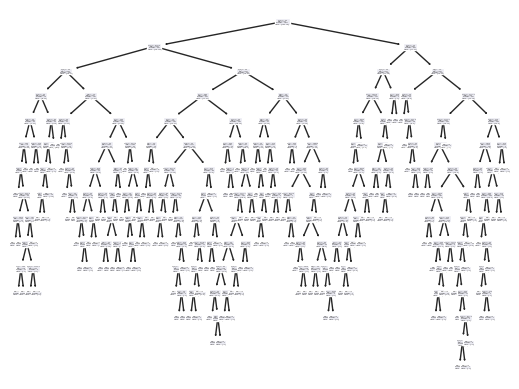

In [76]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree as sklear_tree
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
tree.score(X_test, y_test)
sklear_tree.plot_tree(tree)